In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Impor the DataGov API key
from api_keys import dataapi_key
from api_keys import census_key


In [2]:
url = "https://api.usa.gov/crime/fbi/cde/agency/byStateAbbr/CA?API_KEY=" + dataapi_key
response = requests.get(url)


df=response.json
type(df)

method

In [3]:
#Define the state abbreviations list
states_abbr = ["CA"]

#Define base URL

base_url = "https://api.usa.gov/crime/fbi/cde/agency/byStateAbbr/"

#Create an empty list to store specific fields
state_abbrs = []
oris = []
agency_ids = []
agency_names = []
agency_type_names = []
county_names = []
latitudes = []
longitudes = []

#Iterate over the state abbreviations list
for state_abbr in states_abbr:
    state_url = f"{base_url}{state_abbr}?API_KEY={dataapi_key}"
    response = requests.get(state_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        state_data = response.json()

        #Extract required data fields from above list
        for agency in state_data:
            agency_ids.append(agency.get('agency_id'))
            agency_names.append(agency.get('agency_name'))
            agency_type_names.append(agency.get('agency_type_name'))
            oris.append(agency.get('ori'))
            county_names.append(agency.get('county_name'))
            state_abbrs.append(agency.get('state_abbr'))
            latitudes.append(agency.get('latitude'))
            longitudes.append(agency.get('longitude'))    
        
    else:
        print(f"Failed to retrieve data for state abbreviation: {state_abbr}")

#Create a DataFrame with the extracted fields
state_agency_data = {
    'agency_id': agency_ids,
    'agency_name': agency_names,
    'agency_type_name': agency_type_names,
    'ori': oris,
    'county_name': county_names,
    'state_abbr': state_abbrs,
    'latitude': latitudes,
    'longitude': longitudes
}

state_agency_data_df = pd.DataFrame(state_agency_data)

# Print or use the state_data list as needed
state_agency_data_df.head()

,agency_id,agency_name,agency_type_name,ori,county_name,state_abbr,latitude,longitude
0,937,Alameda County Sheriff's Office,County,CA0010000,ALAMEDA,CA,37.802,-122.26236
1,938,Alameda Police Department,City,CA0010100,ALAMEDA,CA,37.766888,-122.24273
2,939,Albany Police Department,City,CA0010200,ALAMEDA,CA,37.887703,-122.29825
3,940,Berkeley Police Department,City,CA0010300,ALAMEDA,CA,37.870537,-122.27298
4,941,Emeryville Police Department,City,CA0010400,ALAMEDA,CA,37.648134,-121.913291


In [4]:
# Export the agencies info into a csv
state_agency_data_df.to_csv("output_data/state_agencies.csv")

In [5]:
# Show Record Count
state_agency_data_df.count()

agency_id           836
agency_name         836
agency_type_name    836
ori                 836
county_name         836
state_abbr          836
latitude            633
longitude           633
dtype: int64

In [6]:
# # Set base URL for summarized crime data using ori information from above csv file
# #https://api.usa.gov/crime/fbi/cde/arrest/agency/CA0010000/all?from=2017&to=2022&API_KEY=
# url2 = "https://api.usa.gov/crime/fbi/cde/arrest/agency/"

# # use oris from above search result to find and loop to get result?
# ori = "CA0010000"

# agency_all_url = f"https://api.usa.gov/crime/fbi/cde/arrest/agency/{ori}/all?from=2017&to=2022&API_KEY={dataapi_key}" 
# all_offense_res = requests.get(agency_all_url).json()

# pprint(f"The first response is {all_offense_res}.")




In [7]:
state_agency_data_df['ori']

0      CA0010000
1      CA0010100
2      CA0010200
3      CA0010300
4      CA0010400
         ...    
831    CADIT0800
832    CADIT0900
833    CADIT1100
834    CADIT1400
835    CADIT1600
Name: ori, Length: 836, dtype: object

In [8]:
state_agency_data_df['ori']

0      CA0010000
1      CA0010100
2      CA0010200
3      CA0010300
4      CA0010400
         ...    
831    CADIT0800
832    CADIT0900
833    CADIT1100
834    CADIT1400
835    CADIT1600
Name: ori, Length: 836, dtype: object

In [9]:
#define the base url
base_url2 = "https://api.usa.gov/crime/fbi/cde/arrest/agency/"

#Set a lit of ori to be pulled for state_agency_data_df:ori column
ori_list = state_agency_data_df['ori']

#Create an empty dictionary to store data for each offense
offenses_data = {}

#Iterate over the list of oris
for ori in ori_list:
    #Query URL for searching all offenses for the current ori
    agency_all_url = f"{base_url2}{ori}/all?from=2017&to=2022&API_KEY={dataapi_key}"
    
    #GET request
    response = requests.get(agency_all_url)
    
    #Check if the request was successful
    if response.status_code == 200:
        # Retrieve the data for each offense from the response JSON
        data = response.json()['data']
        
        #Retrieved data to the offenses_data dictionary with ori as key
        offenses_data[ori] = data

#Create a DataFrame from the collected data
offenses_df = pd.DataFrame()

# Iterate over the dictionary to add data and ORI to the DataFrame
for ori, data in offenses_data.items():
    temp_df = pd.DataFrame(data)
    temp_df['ori_number'] = ori
    offenses_df = pd.concat([offenses_df, temp_df])

#Display the DataFrame
pprint(offenses_df)

    data_year  Aggravated Assault  All Other Offenses (Except Traffic)  Arson  \
0      2017.0               380.0                               1428.0    6.0   
1      2018.0               442.0                               1394.0    7.0   
2      2019.0               353.0                               1163.0    2.0   
3      2020.0               387.0                                826.0    9.0   
4      2022.0               345.0                                800.0    5.0   
..        ...                 ...                                  ...    ...   
0      2019.0                 1.0                                  0.0    0.0   
1      2021.0                 3.0                                 16.0    0.0   
2      2022.0                 4.0                                 41.0    0.0   
0      2021.0                 2.0                                  9.0    0.0   
1      2022.0                 1.0                                 12.0    0.0   

    Burglary  Curfew and Lo

In [10]:
# Export the Offense_Data into a csv
offenses_df.to_csv("output_data/offensesperori_final.csv")

In [24]:
#from census import Census
#from us import states

# #Census API key
# c = Census(census_key, year=2021)

# #Define the fields you want to retrieve
# fields = ('NAME', 'B19013_001E', 'B01003_001E') 

# #Get the data for all counties in California for 2021
# ca_counties_data = c.acs5.state_county(fields, states.CA.fips, Census.ALL)

# #Convert the data into a DataFrame
# ca_counties_df = pd.DataFrame(ca_counties_data)

# #the county statistics for 2021
# print(county_stats_2021)

In [25]:
#perform an inner merge to include all information
merged_df = offenses_df.merge(state_agency_data_df, left_on='ori_number', right_on='ori', how='inner')

#display the merged DataFrame
print(merged_df)


      data_year  Aggravated Assault  All Other Offenses (Except Traffic)  \
0        2017.0               380.0                               1428.0   
1        2018.0               442.0                               1394.0   
2        2019.0               353.0                               1163.0   
3        2020.0               387.0                                826.0   
4        2022.0               345.0                                800.0   
...         ...                 ...                                  ...   
3554     2019.0                 1.0                                  0.0   
3555     2021.0                 3.0                                 16.0   
3556     2022.0                 4.0                                 41.0   
3557     2021.0                 2.0                                  9.0   
3558     2022.0                 1.0                                 12.0   

      Arson  Burglary  Curfew and Loitering Law Violations  \
0       6.0      50.0    

In [28]:
# Export the merged into a csv
merged_df.to_csv("output_data/merged_df.csv")

In [41]:
# Extract specified columns
VC_df = merged_df[['data_year', 'county_name']].copy()

# Create 'Total Violent Crime' column
VC_df['Total Violent Crime'] = merged_df[['Aggravated Assault', 'Simple Assault',
                                         'Murder and Nonnegligent Manslaughter', 'Manslaughter by Negligence',
                                         'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)', 'Rape']].sum(axis=1)

# Print the new DataFrame
VC_df

,data_year,county_name,Total Violent Crime
0,2017.0,ALAMEDA,757.0
1,2018.0,ALAMEDA,831.0
2,2019.0,ALAMEDA,769.0
3,2020.0,ALAMEDA,815.0
4,2022.0,ALAMEDA,691.0
...,...,...,...
3554,2019.0,NOT SPECIFIED,1.0
3555,2021.0,NOT SPECIFIED,9.0
3556,2022.0,NOT SPECIFIED,10.0
3557,2021.0,NOT SPECIFIED,7.0


In [53]:
VC_df.to_csv("output_data/VC_df.csv")

In [55]:
# Filter out rows with county_name as "Not Specified"
VC_df_filtered = VC_df[VC_df["county_name"] != "Not Specified"]

# Reset the index if needed
if "index" in VC_df_filtered.columns:
    VC_df_filtered = VC_df_filtered.drop(columns=["index"])

# Group the data by "county_name" and "data_year"
ByCounty_VC_df = VC_df_filtered.groupby(["county_name", "data_year"]).sum().reset_index()

# Print the grouped DataFrame
ByCounty_VC_df

,county_name,data_year,Total Violent Crime
0,ALAMEDA,2017,7416.0
1,ALAMEDA,2018,7406.0
2,ALAMEDA,2019,7354.0
3,ALAMEDA,2020,6470.0
4,ALAMEDA,2021,107.0
...,...,...,...
346,YUBA,2017,618.0
347,YUBA,2018,530.0
348,YUBA,2019,540.0
349,YUBA,2020,438.0


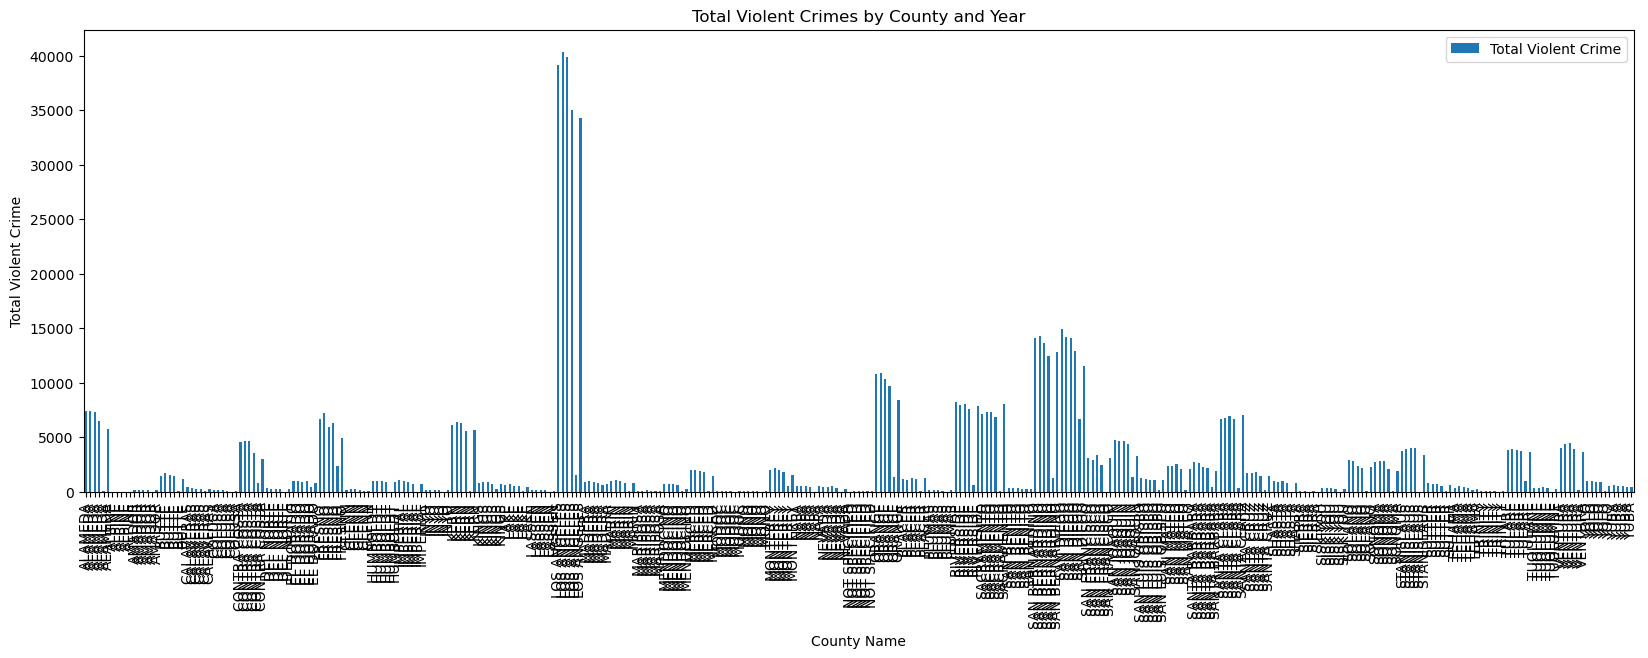

In [57]:
# Create a bar chart using Pandas plot
ByCounty_VC_df.plot(x="county_name", y="Total Violent Crime", kind="bar", figsize=(20, 6), title="Total Violent Crimes by County and Year")

# Set the x and y-axis labels
plt.xlabel("County Name")
plt.ylabel("Total Violent Crime")

# Show the plot
plt.show()

In [58]:
#create a new DataFrame on county with more than 5000 crimes
High_VC_df= ByCounty_VC_df[ByCounty_VC_df["Total Violent Crime"] > 5000]

#print the new DataFrame
High_VC_df

,county_name,data_year,Total Violent Crime
0,ALAMEDA,2017,7416.0
1,ALAMEDA,2018,7406.0
2,ALAMEDA,2019,7354.0
3,ALAMEDA,2020,6470.0
5,ALAMEDA,2022,5727.0
53,FRESNO,2017,6704.0
54,FRESNO,2018,7219.0
55,FRESNO,2019,5899.0
56,FRESNO,2020,6290.0
83,KERN,2017,6137.0


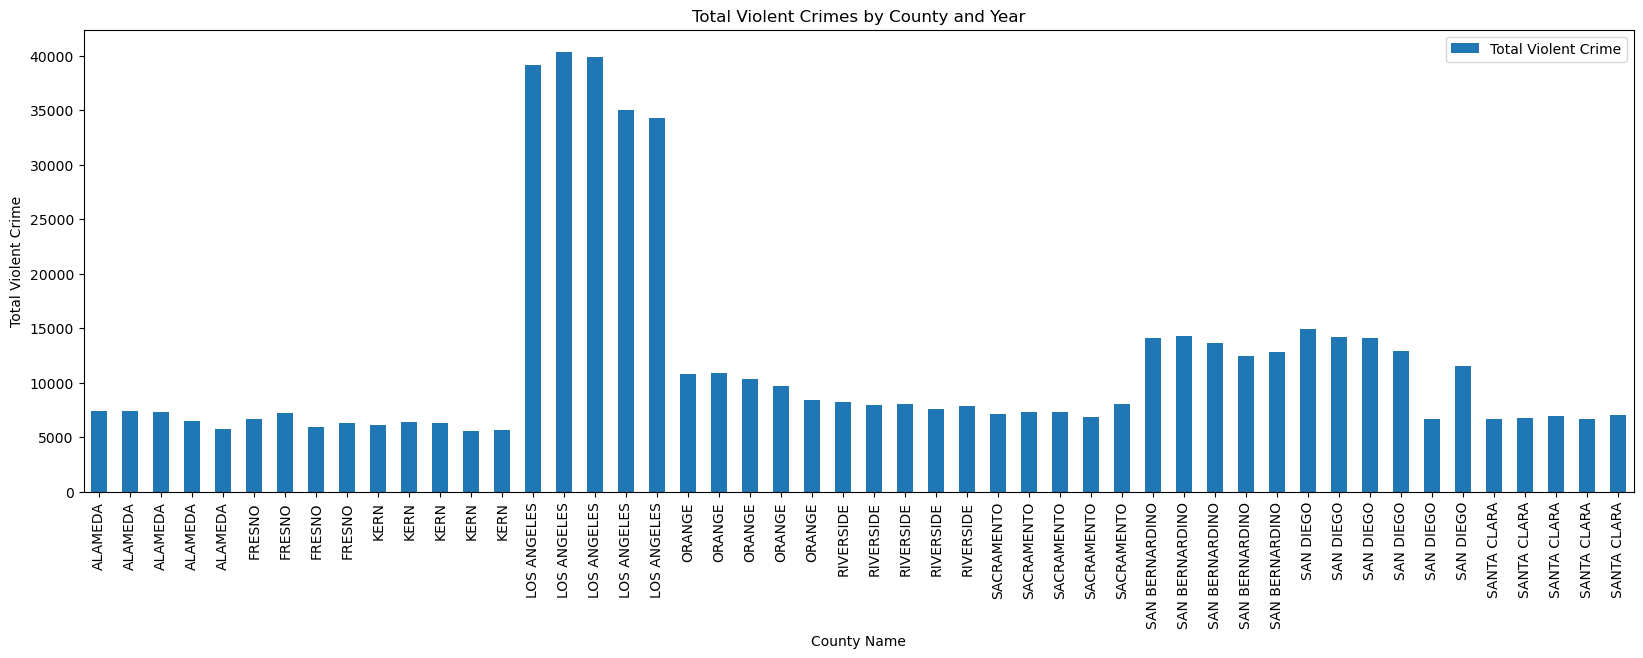

In [59]:
#create a bar chart using Pandas plot for highcrime
High_VC_df.plot(x="county_name", y="Total Violent Crime", kind="bar", figsize=(20, 6), title="Total Violent Crimes by County and Year")

#set the x and y-axis labels
plt.xlabel("County Name")
plt.ylabel("Total Violent Crime")

#show the plot
plt.show()

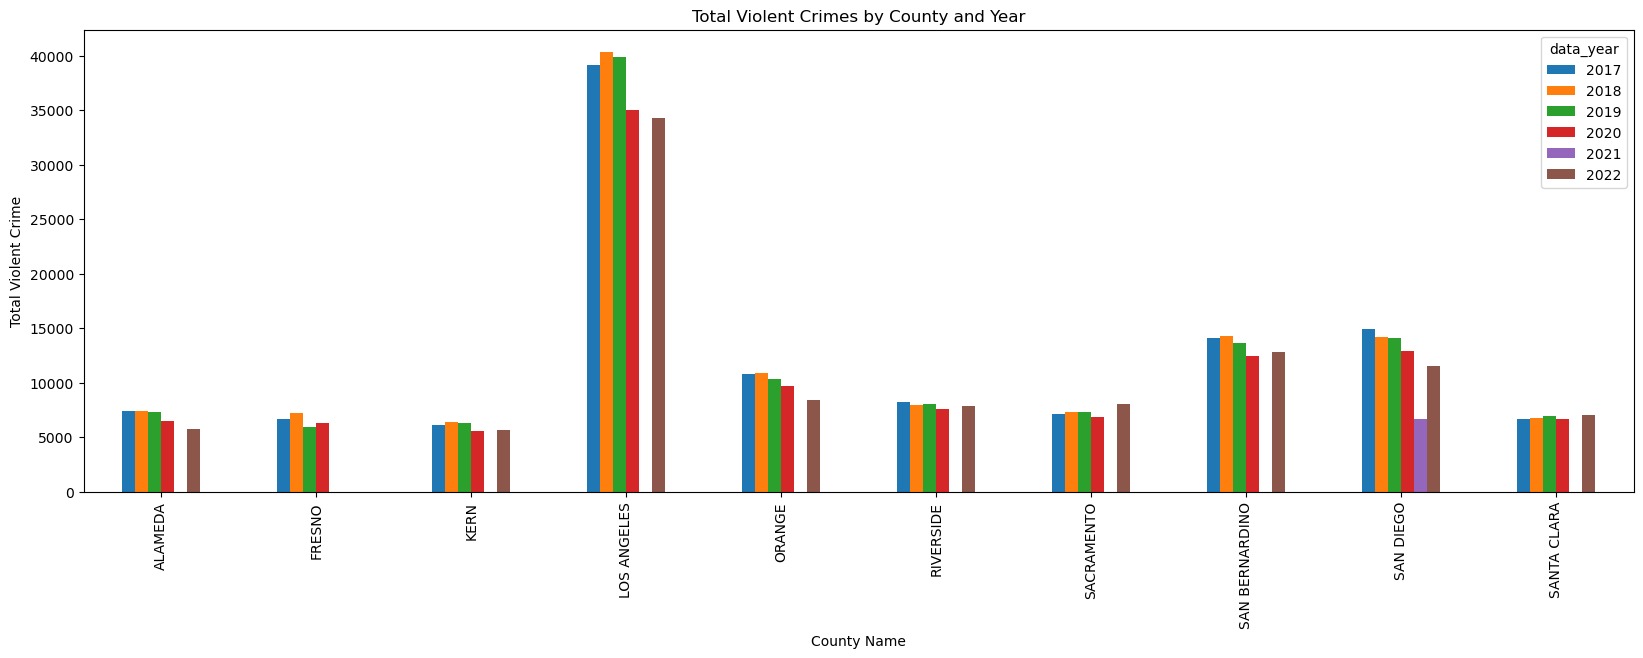

In [61]:
#create a multiplot bar chart with different colors for each year
High_VC_df.pivot(index='county_name', columns='data_year', values='Total Violent Crime').plot(kind='bar', stacked=False, figsize=(20, 6))

#set the title and labels
plt.title("Total Violent Crimes by County and Year")
plt.xlabel("County Name")
plt.ylabel("Total Violent Crime")

#show the plot
plt.show()